<a href="https://colab.research.google.com/github/Reem93-alazemi/rao-algo/blob/main/theavarge_rao1_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#libaraies 
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

In [67]:
 #Global scope
 maxfes = 10  # Maximum functions evaluation
 dim = 2  # Number of design variables
 SearchAgents_no = 5  # Population size
 Max_iter = math.floor(maxfes / SearchAgents_no)  # Maximum number of iterations
 lb = -5.12 * np.ones(dim)  # lower bound
 ub = 5.12 * np.ones(dim)  # upper bound

In [68]:
#calculate fitness value 
def fitness(particle):
    y = 0
    for i in range(dim):
      if y > 5.12 or y < -5.12:
        y= y+ 10*i + 10*particle[i]**2 # the function   
      else: y =y+ 10*i + particle[i] ** 2 - 10 * math.cos(2 * math.pi * particle[i])

    return y

In [69]:
def rao():

  # initialzing arrays to store the values 
 Positions = np.zeros((SearchAgents_no, dim))   # search agent position
 best_pos = np.zeros(dim)  # search agent's best position
 worst_pos = np.zeros(dim)  # search agent's worst position

 finval = np.zeros(Max_iter)  # best score of each iteration
 f1 = np.zeros(SearchAgents_no)  # function value of current population
 f2 = np.zeros(SearchAgents_no)  # function value of updated population

 
 for i in range(dim):
    Positions[:, i] = np.random.uniform(0, 1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i]
 for k in range(0, Max_iter):
    best_score = float("inf")
    worst_score = float("-inf")
    for i in range(0, SearchAgents_no):
        # Return back the search agents that go beyond the boundaries of the search space
        for j in range(dim):
            Positions[i, j] = np.clip(Positions[i, j], lb[j], ub[j])
        f1[i] = fitness(Positions[i, :])
        if f1[i] < best_score:
            best_score = f1[i].copy()  # Update best
            best_pos = Positions[i, :].copy()
        if f1[i] > worst_score:
            worst_score = f1[i].copy();  # Update worst
            worst_pos = Positions[i, :].copy()
    # Update the Position of search agents including omegas
    finval[k] = best_score
    print("The best solution is: ", best_score, " in iteration number: ", k + 1)
    Positioncopy = Positions.copy()
    for i in range(0, SearchAgents_no):
        for j in range(0, dim):
            r1 = random.random()  # r1 is a random number in [0,1]
            Positions[i, j] = Positions[i, j] + r1 * (best_pos[j] - worst_pos[j])  # change in position
            Positions[i, j] = np.clip(Positions[i, j], lb[j], ub[j])
        f2[i] = fitness(Positions[i, :])
    for i in range(0, SearchAgents_no):
        if f1[i] < f2[i]:
            Positions[i, :] = Positioncopy[i, :]
 best_score = np.amin(finval)
 print("The final best from all iteration is ", best_score)
 return best_score 


Enter the number of trials: 5
The best solution is:  4.10322162795107  in iteration number:  1
The best solution is:  4.10322162795107  in iteration number:  2
The final best from all iteration is  4.10322162795107
The trial best is:  4.10322162795107
---------------------------: 
The best solution is:  30.003740958942863  in iteration number:  1
The best solution is:  9.34006912959636  in iteration number:  2
The final best from all iteration is  9.34006912959636
The trial best is:  9.34006912959636
---------------------------: 
The best solution is:  3.710069559064525  in iteration number:  1
The best solution is:  3.710069559064525  in iteration number:  2
The final best from all iteration is  3.710069559064525
The trial best is:  3.710069559064525
---------------------------: 
The best solution is:  21.335298592120097  in iteration number:  1
The best solution is:  14.332518850526792  in iteration number:  2
The final best from all iteration is  14.332518850526792
The trial best is

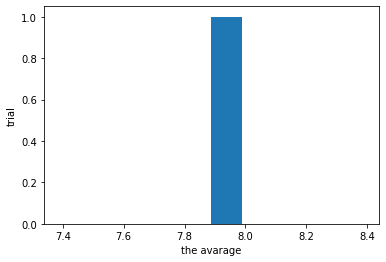

In [70]:
#the main 
best_arr = [tr]
tr = int(input('Enter the number of trials: '))
for i in range(tr):
  bestsc = rao()
  print("The trial best is: ",  bestsc)
  print("---------------------------: ")
  best_arr.append(bestsc)

samples = [np.mean( best_arr)]
print("The avarage is: ",  samples)
plt.hist(samples)
plt.xlabel('the avarage')
plt.ylabel('trial')
plt.show()
